# 自编码器

### autoencoder
> 做一个自编码器，提取新的特征

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers,optimizers,losses,metrics,datasets,models
import datetime
import numpy as np

In [2]:
mnist = datasets.mnist.load_data()

In [3]:
# 数据预处理
batch_size = 128
def pre_process(x,y):
    x = tf.cast(x,dtype=tf.float32)/255.
    y = tf.cast(y,dtype=tf.int32)
    return x,y
train_data,test_data = mnist
db_train = tf.data.Dataset.from_tensor_slices(train_data)
db_train = db_train.map(pre_process).shuffle(3000).batch(batch_size)

In [24]:
#搭建网络
# class AutoEncoder(models.Model):
#     def __init__(self):
#         super(AutoEncoder,self).__init__()
#         # autoencoder
encoder = Sequential([
    layers.Flatten(),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(16)
])

decoder = Sequential([
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(784,activation=tf.nn.sigmoid),
    layers.Reshape((28,28))
])

encoder.build(input_shape = (None,28,28))
decoder.build(input_shape = (None,16))


In [25]:
encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  100480    
_________________________________________________________________
dense_9 (Dense)              multiple                  8256      
_________________________________________________________________
dense_10 (Dense)             multiple                  2080      
_________________________________________________________________
dense_11 (Dense)             multiple                  528       
Total params: 111,344
Trainable params: 111,344
Non-trainable params: 0
_________________________________________________________________


In [26]:
decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  544       
_________________________________________________________________
dense_13 (Dense)             multiple                  2112      
_________________________________________________________________
dense_14 (Dense)             multiple                  8320      
_________________________________________________________________
dense_15 (Dense)             multiple                  101136    
_________________________________________________________________
reshape_1 (Reshape)          multiple                  0         
Total params: 112,112
Trainable params: 112,112
Non-trainable params: 0
_________________________________________________________________


In [77]:
#训练
max_iter = 5
optimizer = optimizers.Adam(learning_rate=0.001)
for iter_step in range(max_iter):
    for i,(ix,iy) in enumerate(db_train):
        begin_time = datetime.datetime.now()
        with tf.GradientTape() as tape:
            code = encoder(ix)
            decode = decoder(code)
            loss = tf.reduce_mean(tf.pow(ix-decode,2))
        grads = tape.gradient(loss,encoder.trainable_variables + decoder.trainable_variables)
        optimizer.apply_gradients(zip(grads,encoder.trainable_variables + decoder.trainable_variables))
        end_time = datetime.datetime.now()
        if i%200==0:
            print('step {0} : loss = {1} {2} pic/s '.format(i,float(loss),batch_size/(end_time-begin_time).total_seconds()))

step 0 : loss = 0.0212248545140028 365.33642347058185 pic/s 
step 200 : loss = 0.02092049829661846 6767.831650187702 pic/s 
step 400 : loss = 0.020426994189620018 6756.400105568751 pic/s 
step 0 : loss = 0.020251041278243065 6754.61741424802 pic/s 
step 200 : loss = 0.019817622378468513 6754.973877249459 pic/s 
step 400 : loss = 0.01943523809313774 6751.767064036291 pic/s 
step 0 : loss = 0.019183918833732605 5822.416302765648 pic/s 
step 200 : loss = 0.018584944307804108 6754.973877249459 pic/s 
step 400 : loss = 0.01835327036678791 6744.6517019707035 pic/s 
step 0 : loss = 0.01808341220021248 7128.9334447229185 pic/s 
step 200 : loss = 0.017533352598547935 7131.316507883447 pic/s 
step 400 : loss = 0.017469586804509163 6740.744641634631 pic/s 
step 0 : loss = 0.017444919794797897 6767.831650187702 pic/s 
step 200 : loss = 0.016895994544029236 7114.273010226767 pic/s 
step 400 : loss = 0.01688549295067787 6754.61741424802 pic/s 


In [56]:
# 数据可视化
# feed an image, and then compare the origin image and decode image
img = next(iter(db_train))
len(img[0])
rnd = tf.random.shuffle(range(64))[0]
img = img[0][rnd]
origin_img = img*255
img = img[np.newaxis,:]
feed = tf.convert_to_tensor(img)
print(feed.shape)
# origin_img


(1, 28, 28)


In [57]:
# decode

# features = encoder(tf.zeros((1,28,28)))
features = encoder(feed)

decode = decoder(features)

In [58]:
dec_img = decode*255
dec_img = tf.reshape(dec_img,(28,28)) 

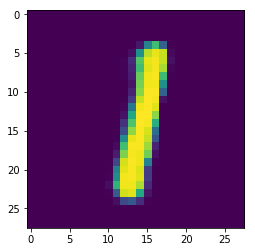

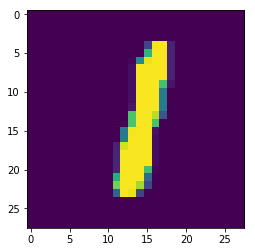

In [59]:
from matplotlib import pyplot as plt
plt.imshow(dec_img)
plt.figure()
plt.imshow(origin_img)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


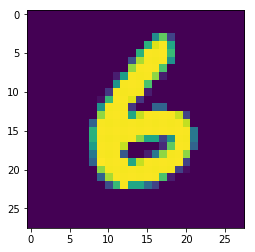

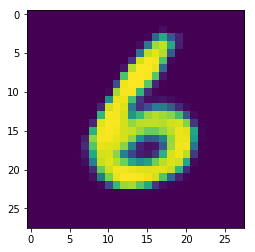

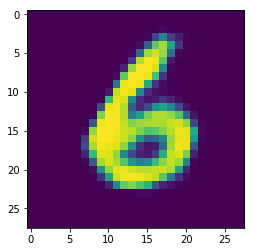

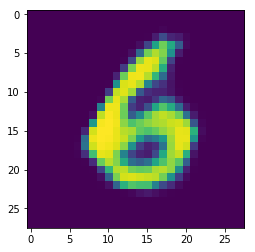

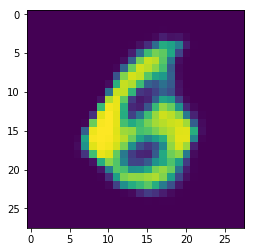

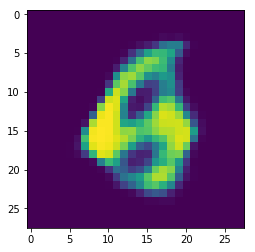

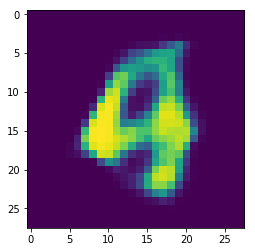

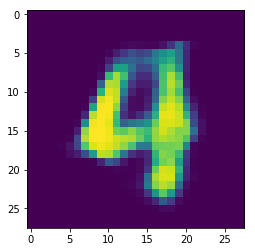

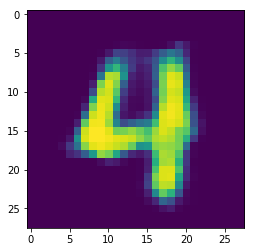

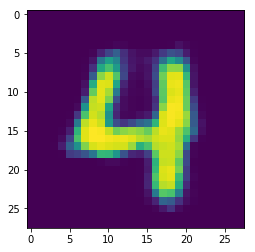

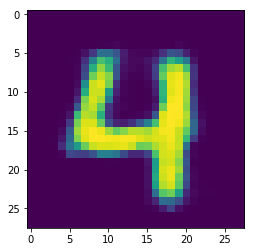

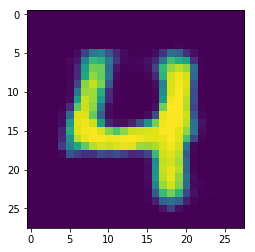

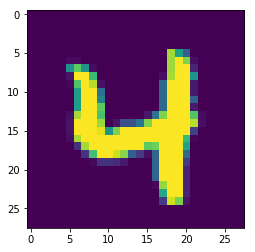

In [82]:
# 转化 从n到m
def showimg(data):
    data = data*255
    data = tf.reshape(data,(28,28)) 
    plt.figure()
    plt.imshow(data)

imgs = next(iter(db_train))
m,n = tf.random.shuffle(range(64))[:2]
print(imgs[1][m])
print(imgs[1][n])
m_features = encoder(imgs[0][m][np.newaxis,:]) # (1,16)
n_features = encoder(imgs[0][n][np.newaxis,:]) # (1,16)

slices = 10
showimg(imgs[0][n])
for i in range(slices+1):
    code = (i/slices)*m_features + (1-i/slices)*n_features
    data = decoder(code)
    showimg(data)
showimg(imgs[0][m])